In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
import scipy.signal
import scipy.fftpack
import scipy.io.wavfile
import copy

# The goal of this notebook is to create a spectrogram from a chirp signal.
# Input to the assignments is a matrix containing the signal, the sampling rate and the timevector


dict_keys(['__header__', '__version__', '__globals__', 'signal', 'srate', 'time'])
<class 'numpy.ndarray'> 6001 1000 6001 [-3.    -2.999 -2.998 ...  2.998  2.999  3.   ]


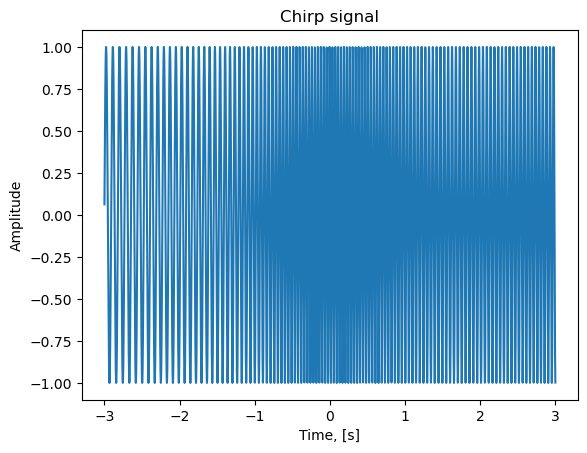

In [2]:
# first of all have a look at the signal
signal = sio.loadmat(r'C:\Users\GIANNI\Desktop\DSP applications on Matlab and Python\Section 3_Spectral and rythmicity analysis\sigprocMXC_spectral\spectral_codeChallenge')
print(signal.keys())

chirp = signal['signal'].flatten()
srate = int(signal['srate']) # in Hz
time = signal['time'].flatten()

print(type(chirp), len(chirp), srate, len(time), time)

plt.figure()
plt.plot(time, chirp)
plt.xlabel('Time, [s]')
plt.ylabel('Amplitude')
plt.title('Chirp signal')
plt.show()

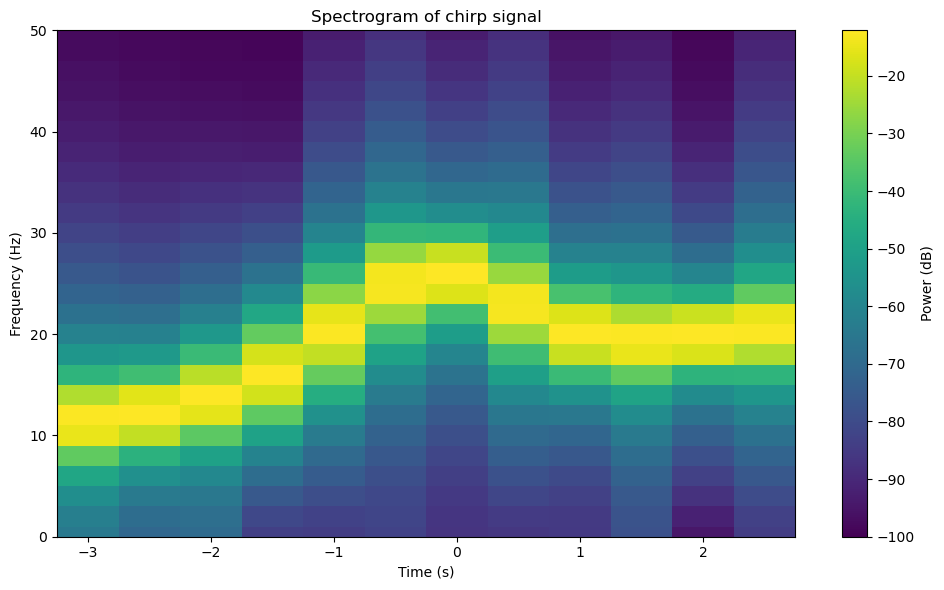

In [4]:
# I expect the spectogram to show gradually increasing frequencies in t = [-3, 0] and then gradually decreasing frequencies in t = [0, 3], getting
# not as low as the beginning

# do Welch method with windows of 500 ms (not overlapped) and without averaging at the end

windowlength = 500                              # ms = data points/window
num_windows = len(time)  // windowlength
# Compute frequency bins manually
frequencies = np.array([(k * srate) / windowlength for k in range(windowlength // 2 + 1)])

# Initialize power matrix (Fixed)
chirppowM = np.zeros((len(frequencies), num_windows))

# Compute power spectrum for each window
for i in range(num_windows):
    start = i * windowlength
    end = start + windowlength
    windowed_signal = chirp[start:end] * np.hanning(windowlength)  # Apply window function
    
    # Compute FFT and power spectrum
    chirppow = np.abs(scipy.fftpack.fft(windowed_signal) / windowlength) ** 2
    chirppow = chirppow[:windowlength // 2 + 1]  # Keep only positive frequencies
    
    # Store in power matrix
    chirppowM[:, i] = chirppow

# Create a time axis for the spectrogram
time_axis = np.array([time[i * windowlength] for i in range(num_windows)])

# Add log scaling to improve visualization
chirppowM = 10 * np.log10(chirppowM + 1e-10)

# Plot spectrogram

plt.figure(figsize=(10, 6))
plt.pcolormesh(time_axis, frequencies, chirppowM, 
                vmin=chirppowM.min(), vmax=chirppowM.max(), 
                shading='auto', cmap='viridis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 50])
plt.title('Spectrogram of chirp signal')
plt.colorbar(label="Power (dB)")
plt.tight_layout()
plt.show()




